In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# from dataprep.eda import create_report
from datetime import datetime

In [37]:
marketing = pd.read_csv(r'C:\Users\de969\OneDrive\Escritorio\proyecto, machine learnig\data\raw\marketing_campaign.csv', sep='\t')
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [38]:
# Función para calcular la edad actual
def calculate_age(year):
    current_year = datetime.now().year
    age = current_year - year
    return age


# Reemplazar la columna 'Year_Birth' por las edades correspondientes
marketing['Year_Birth'] = marketing['Year_Birth'].apply(calculate_age)

# Imprimir el DataFrame actualizado
print(marketing)


         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524          66  Graduation         Single  58138.0        0   
1      2174          69  Graduation         Single  46344.0        1   
2      4141          58  Graduation       Together  71613.0        0   
3      6182          39  Graduation       Together  26646.0        1   
4      5324          42         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870          56  Graduation        Married  61223.0        0   
2236   4001          77         PhD       Together  64014.0        2   
2237   7270          42  Graduation       Divorced  56981.0        0   
2238   8235          67      Master       Together  69245.0        0   
2239   9405          69         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [39]:
m = pd.DataFrame({'Marital_Status': ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']})

# Mapear el estado civil a valores binarios (1 para casado, 0 para soltero)
marketing['Marital_Status_Binary'] = marketing['Marital_Status'].map({'Single': 0, 'Together': 1, 'Married': 1, 'Divorced': 0, 'Widow': 0, 'Alone': 0, 'Absurd': 0, 'YOLO': 0})

# Imprimir el DataFrame actualizado
print(marketing.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Marital_Status_Binary'],
      dtype='object')


In [40]:
marketing['Kids'] = marketing['Kidhome'] + marketing['Teenhome']
marketing.drop(['Kidhome', 'Teenhome'], axis=1)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_Binary,Kids
0,5524,66,Graduation,Single,58138.0,04-09-2012,58,635,88,546,...,0,0,0,0,0,3,11,1,0,0
1,2174,69,Graduation,Single,46344.0,08-03-2014,38,11,1,6,...,0,0,0,0,0,3,11,0,0,2
2,4141,58,Graduation,Together,71613.0,21-08-2013,26,426,49,127,...,0,0,0,0,0,3,11,0,1,0
3,6182,39,Graduation,Together,26646.0,10-02-2014,26,11,4,20,...,0,0,0,0,0,3,11,0,1,1
4,5324,42,PhD,Married,58293.0,19-01-2014,94,173,43,118,...,0,0,0,0,0,3,11,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,Graduation,Married,61223.0,13-06-2013,46,709,43,182,...,0,0,0,0,0,3,11,0,1,1
2236,4001,77,PhD,Together,64014.0,10-06-2014,56,406,0,30,...,0,0,1,0,0,3,11,0,1,3
2237,7270,42,Graduation,Divorced,56981.0,25-01-2014,91,908,48,217,...,1,0,0,0,0,3,11,0,0,0
2238,8235,67,Master,Together,69245.0,24-01-2014,8,428,30,214,...,0,0,0,0,0,3,11,0,1,1


In [41]:
def fixed_df(arg):
    d = {1: 'Yan', 2: 'Feb', 3: 'March', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 
         'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'November', 12: 'December'}

    arg = int(arg.split('-')[1])
    return d[arg]

marketing['date'] = marketing['Dt_Customer'].apply(fixed_df)

In [44]:
marketing['monto_gastado'] = marketing['MntFishProducts'] + marketing['MntFruits'] + marketing['MntGoldProds'] + marketing['MntMeatProducts'] + marketing['MntSweetProducts'] + marketing['MntWines']

In [46]:
# marketing = marketing.drop(['Kidhome', 'Teenhome', 'Z_CostContact'], axis=1)

In [47]:
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_Revenue', 'Response', 'Marital_Status_Binary', 'Kids',
       'date', 'monto_gastado'],
      dtype='object')

In [50]:
gasto_por_mes= marketing.groupby('date')['monto_gastado'].mean().sort_values()
gasto_por_mes

date
Jun         498.746988
July        508.346535
March       542.981043
December    553.354286
Apr         566.335165
May         590.750000
Yan         610.573604
Oct         618.033019
Feb         628.365169
Aug         664.139640
Sep         688.725389
November    733.978610
Name: monto_gastado, dtype: float64

In [51]:

data = marketing.groupby('Kids')['monto_gastado'].mean().sort_values()
data

Kids
2     245.947743
3     274.603774
1     472.733156
0    1106.029781
Name: monto_gastado, dtype: float64

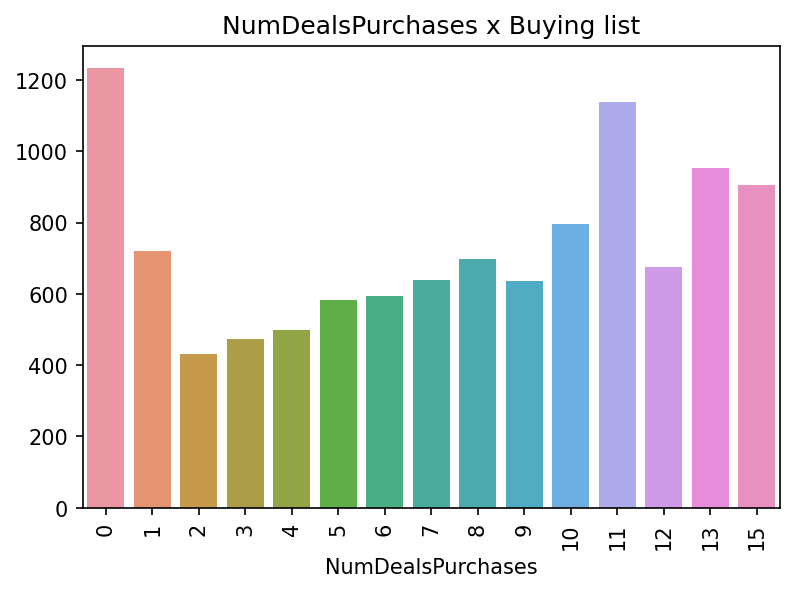

NumDealsPurchases
2      429.714286
3      474.363636
4      498.507937
5      581.840426
6      592.639344
9      635.125000
7      638.300000
12     676.000000
8      698.071429
1      720.335052
10     795.400000
15     904.571429
13     952.000000
11    1138.600000
0     1234.760870
Name: monto_gastado, dtype: float64



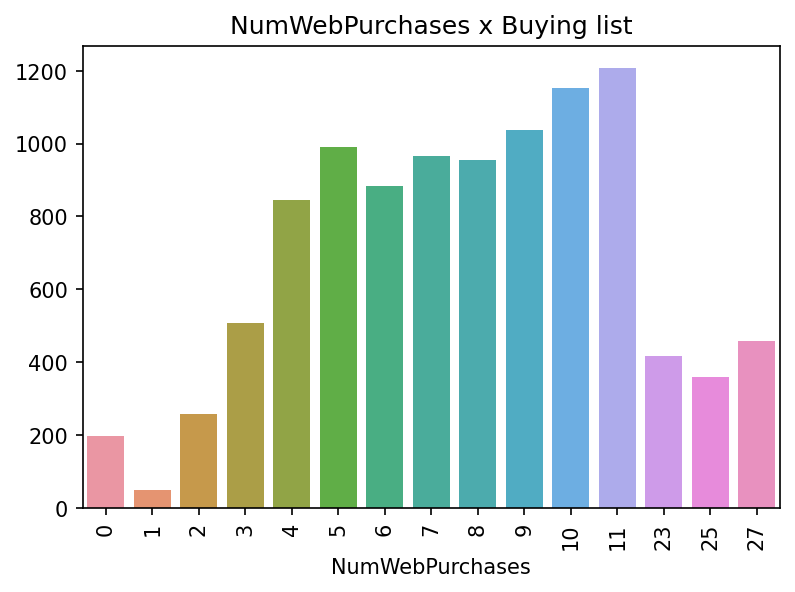

NumWebPurchases
1       47.282486
0      196.551020
2      257.075067
25     359.000000
23     416.000000
27     457.000000
3      506.607143
4      843.610714
6      882.478049
8      954.245098
7      965.567742
5      991.377273
9     1038.453333
10    1151.976744
11    1208.727273
Name: monto_gastado, dtype: float64



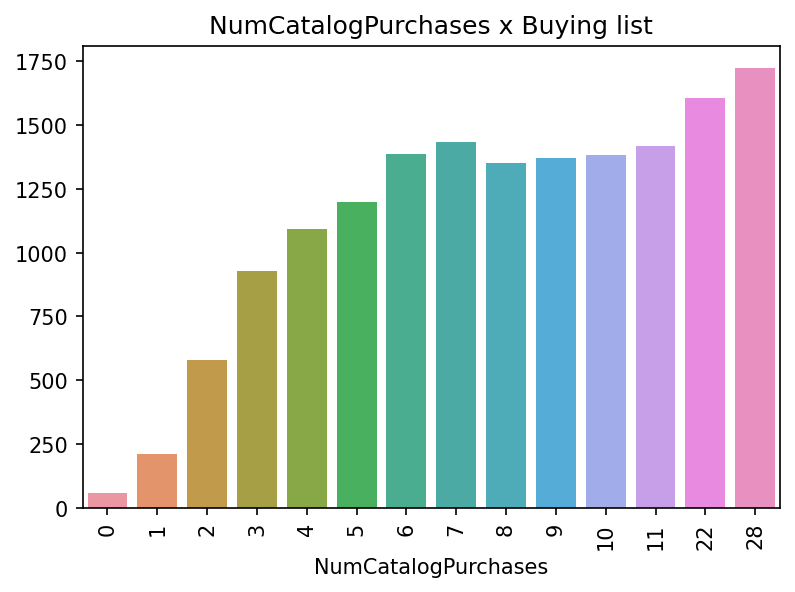

NumCatalogPurchases
0       56.890785
1      208.653924
2      578.931159
3      928.853261
4     1091.467033
5     1197.185714
8     1351.145455
9     1370.500000
10    1383.541667
6     1388.554688
11    1418.789474
7     1433.430380
22    1608.000000
28    1725.666667
Name: monto_gastado, dtype: float64



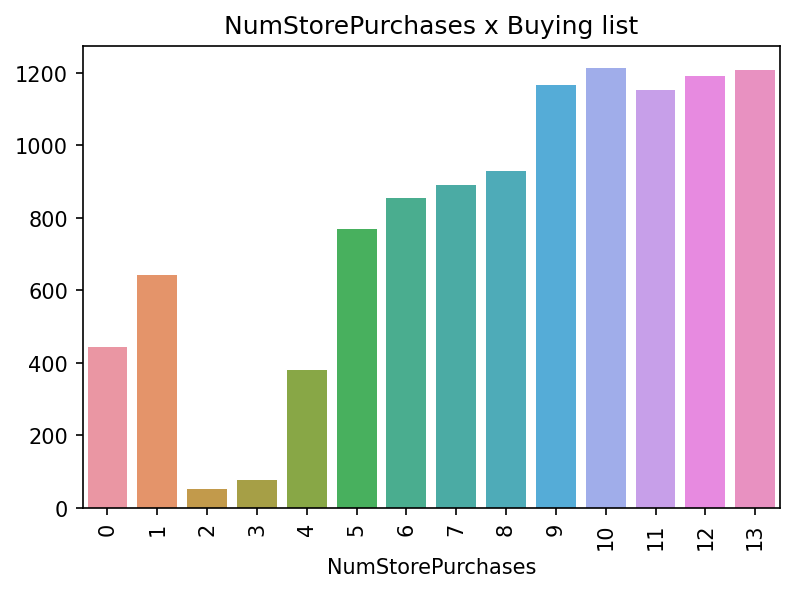

NumStorePurchases
2       50.183857
3       76.559184
4      380.811146
0      442.800000
1      641.142857
5      767.452830
6      852.893258
7      888.713287
8      929.060403
11    1151.444444
9     1166.971698
12    1191.466667
13    1208.542169
10    1213.928000
Name: monto_gastado, dtype: float64



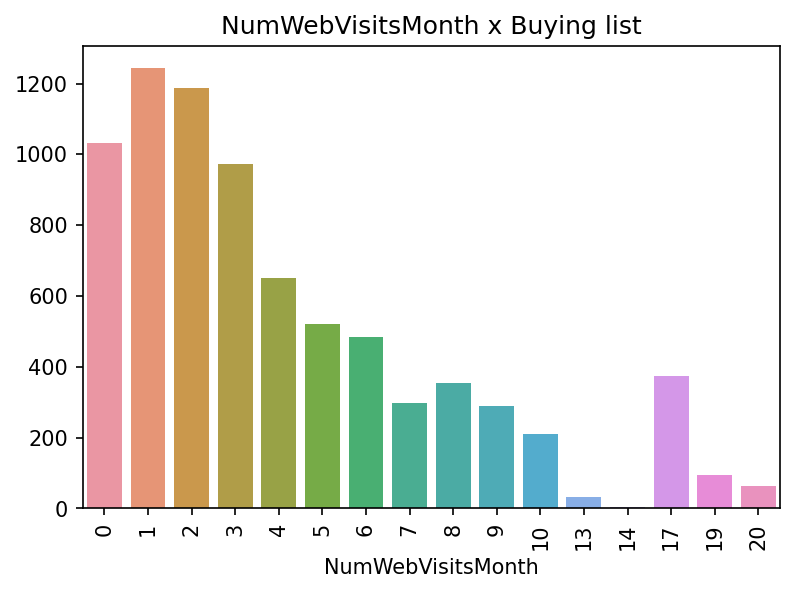

NumWebVisitsMonth
14       5.500000
13      32.000000
20      64.666667
19      93.500000
10     211.666667
9      288.120482
7      297.167939
8      353.122807
17     373.000000
6      485.467647
5      521.064057
4      650.458716
3      973.946341
0     1031.000000
2     1186.346535
1     1242.921569
Name: monto_gastado, dtype: float64



In [53]:
l = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
for i in l:
    data = marketing.groupby(i)['monto_gastado'].mean().sort_values()
    plt.figure(dpi=150 , figsize=(6, 4))
    plt.title(f'{i} x Buying list')
    sns.barplot(x=data.index, y=data.values,)
    plt.xticks(rotation=90)
    plt.show()
    print(data)
    print('')